In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ce1 import *
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

## Create data

Let's create a collection of points with some "shapes." It will be interesting to see how K-means and Spectral clustering manage it differently.

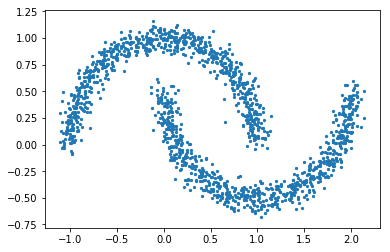

In [5]:
moons_data = make_moons(n_samples=1500, noise=0.07, random_state=0)
moons = moons_data[0]
plt.scatter(moons[:,0], moons[:,1], s=5)

## K-means clustering

Let's take a look at my K-means clustering results paired with the results of the corresponding built in sklearn function, and evaluate the efficacy of the work via time (in seconds). 

#### My implementation:

--- 0.15566086769104004 seconds ---


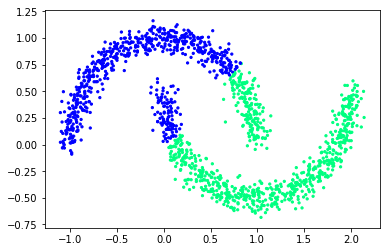

In [20]:
start_time = time.time()

my_km = my_kmeans(moons, 2, 31)

stop_time = time.time()
print("--- %s seconds ---" % (stop_time-start_time))

# Plot the results
my_km_centers = my_km[0]
my_km_labels = my_km[1]

# Plot and color the points according to their label
plt.scatter(moons[:,0], moons[:,1], c=my_km_labels, s=5, cmap="winter")

#### Sklearn's implementation:

--- 0.027688980102539062 seconds ---


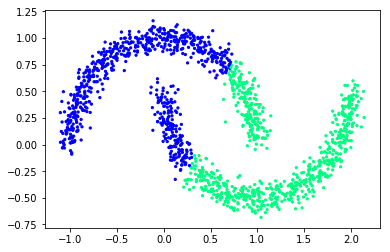

In [21]:
start_time = time.time()

km_alg = KMeans(n_clusters=2, init="random", random_state = 1, max_iter = 200)
fit = km_alg.fit(moons)

stop_time = time.time()
print("--- %s seconds ---" % (stop_time-start_time))

# Plot and color the points according to their label
sk_km_labels = fit.labels_
plt.scatter(moons[:,0], moons[:,1], c=sk_km_labels, s=5, cmap="winter")

#### Observation:

The results are slightly different. If we imagine that we draw a line on each plot to divide the points into two clusters, the line that sklearn's implementation draws is steeper than that of my implementation. But the idea is the same. K-means clustering does not seem to do what we expected on this dataset, which has a "graphical feature."

It is not very surprising to see that my implemention (0.156s) is slower than the sklearn's (0.028s), because the algorithm of sklearn must have been optimized. The time varies each time I run the code, but in general the sklearn's won't take more than 0.1s, while mine won't take less than 0.1s

## Spectral clustering 

Let's take a look at my Spectral clustering results paired with the results of the corresponding built in sklearn function, and evaluate the efficacy of the work via time (in seconds). 

#### My implementation:

--- 1.3464438915252686 seconds ---


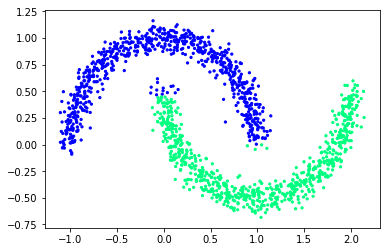

In [25]:
start_time = time.time()

adj = make_adj(moons)
L = my_laplacian(adj)
my_sc = spect_clustering(L,2)

stop_time = time.time()
print("--- %s seconds ---" % (stop_time-start_time))

# Plot the results
my_sc_labels = my_sc[0]

# Plot and color the points according to their label
plt.scatter(moons[:,0], moons[:,1], c=my_sc_labels, s=5, cmap="winter")

#### Sklearn's implementation:

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


--- 0.5757858753204346 seconds ---


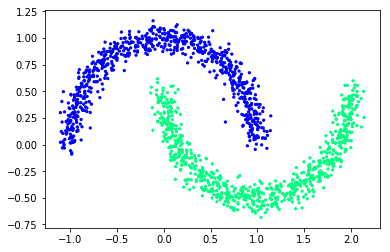

In [24]:
start_time = time.time()

sc = SpectralClustering(
    n_clusters=2,
    random_state=42,
    affinity='nearest_neighbors',
    n_neighbors=10,
    assign_labels='kmeans'
)

sc.fit(moons)

stop_time = time.time()
print("--- %s seconds ---" % (stop_time-start_time))

# Plot and color the points according to their label
sk_sc_labels = sc.labels_
plt.scatter(moons[:,0], moons[:,1], c=sk_sc_labels, s=5, cmap="winter")

#### Observation:

The sklearn's spectral clustering is giving me the results I was expecting since the first glance of the dataset - each arch is a cluster. My implementation is also going in the right direction, but there is a tiny amount of points that are mistakenly clustered to the other arch. In terms of time, again, my implenention (1.346s) is slower than the sklearn's (0.576s). The time varies each time I run the code, but in general the sklearn's won't take more than 1s, while mine won't take less than 1s.

With the above visualizations, it seems that spectral clustering is more sensitive to the "shape" of the data, at lease in the two-dimensional space. However, it requires a bit more computations than k-means, and takes slightly more time. Personally speaking, I like that spectral clustering better.

#### An overall view of the four plots:

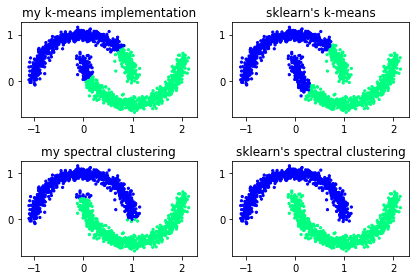

In [93]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].scatter(moons[:,0], moons[:,1], c=my_km_labels, s=5, cmap="winter")
ax[0, 1].scatter(moons[:,0], moons[:,1], c=sk_km_labels, s=5, cmap="winter")
ax[1, 0].scatter(moons[:,0], moons[:,1], c=my_sc_labels, s=5, cmap="winter")
ax[1, 1].scatter(moons[:,0], moons[:,1], c=sk_sc_labels, s=5, cmap="winter")

ax[0, 0].set_title("my k-means implementation")
ax[0, 1].set_title("sklearn's k-means")
ax[1, 0].set_title("my spectral clustering")
ax[1, 1].set_title("sklearn's spectral clustering")

fig.tight_layout()
plt.show()

While this comparison between k-means and spectral clustering, we now have some intuition about the two algorithms.